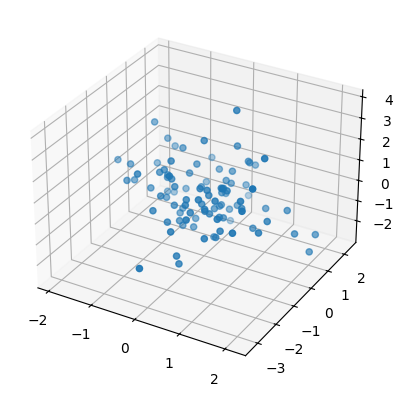

(100, 3)

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)
X = np.random.randn(100, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()
X.shape

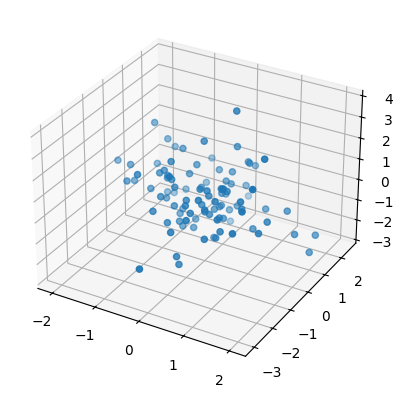

In [39]:
X_centered = X - X.mean(axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])
plt.show()

In [40]:
U, s, Vt = np.linalg.svd(X_centered)
len(Vt), Vt

(3,
 array([[-0.14276678, -0.34442383,  0.9278954 ],
        [ 0.27861938, -0.91357208, -0.29623857],
        [-0.94973096, -0.21623661, -0.22639089]]))

In [41]:
c1 = Vt[0]
c2 = Vt[1]

In [43]:
W2 = Vt[:2].T
X2D = X_centered @ W2

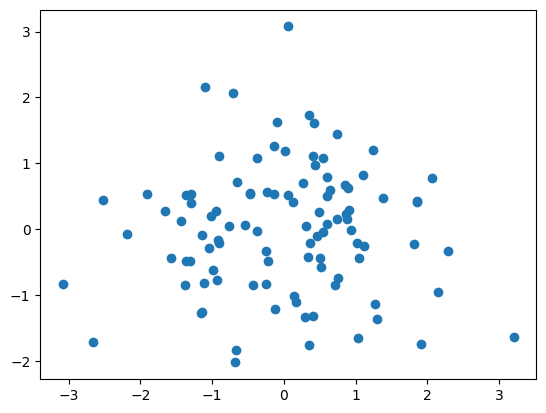

In [46]:
plt.scatter(X2D[:,0], X2D[:,1])

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

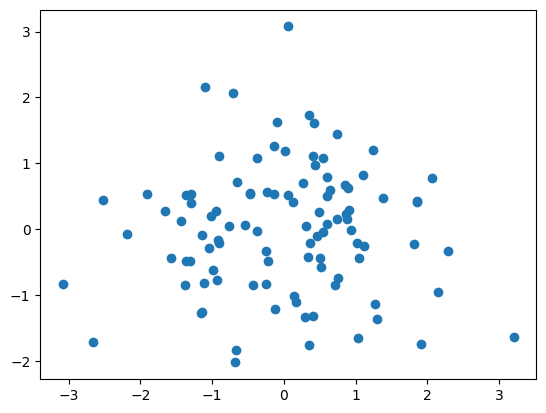

In [48]:
plt.scatter(X2D[:,0], X2D[:,1])

In [49]:
pca.explained_variance_ratio_

array([0.45375329, 0.3221149 ])

In [51]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)

X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.70466436e-02, 7.09592406e-02, 6.16908876e-02, 5.38941949e-02,
       4.86879702e-02, 4.31223132e-02, 3.27192995e-02, 2.88389545e-02,
       2.76202940e-02, 2.35700055e-02, 2.10918962e-02, 2.02299108e-02,
       1.71581820e-02, 1.69211143e-02, 1.57864128e-02, 1.48295261e-02,
       1.32456095e-02, 1.27689737e-02, 1.18726294e-02, 1.15268370e-02,
       1.06616621e-02, 1.00671337e-02, 9.53573327e-03, 9.12543746e-03,
       8.83404692e-03, 8.39319141e-03, 8.12578809e-03, 7.86366084e-03,
       7.44733102e-03, 6.90859128e-03, 6.58093773e-03, 6.48147870e-03,
       6.02615030e-03, 5.86582188e-03, 5.70021474e-03, 5.43627771e-03,
       5.05786416e-03, 4.87858604e-03, 4.81429342e-03, 4.72266326e-03,
       4.56746921e-03, 4.44836012e-03, 4.18501329e-03, 3.98215339e-03,
       3.84974607e-03, 3.75103387e-03, 3.62008852e-03, 3.51591277e-03,
       3.40058205e-03, 3.21874467e-03, 3.19017051e-03, 3.12804939e-03,
       2.95982668e-03, 2.88954600e-03, 2.84130398e-03, 2.71435811e-03,
      

In [52]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [54]:
cumsum[:20]

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ])

In [62]:
d = np.argmax(cumsum >= 0.95) + 1
d

154

In [60]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [61]:
pca.n_components_

154

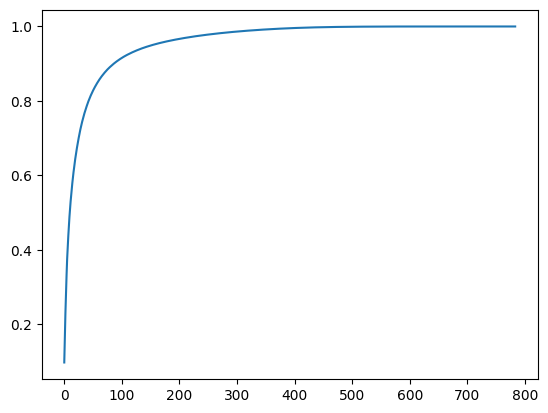

In [63]:
plt.plot(cumsum)